In [93]:
import pandas as pd

In [94]:
!gdown 1OKJvWZphsDTE1ldOpb-AwN4Xcu2C3gNY&usp

/bin/bash: line 1: usp: command not found
Downloading...
From: https://drive.google.com/uc?id=1OKJvWZphsDTE1ldOpb-AwN4Xcu2C3gNY
To: /content/BD.xlsx
100% 215k/215k [00:00<00:00, 5.82MB/s]


In [95]:
df = pd.read_excel('BD.xlsx', sheet_name=None)
df['Треки']

,ID,Название трека,ID альбома,ID жанра,Длительность,Размер,Стоимость
0,1,For Those About To Rock (We Salute You),1,1,343719,11170334,101
1,2,Balls to the Wall,2,1,342562,5510424,161
2,3,Fast As a Shark,3,1,230619,3990994,96
3,4,Restless and Wild,3,1,252051,4331779,133
4,5,Princess of the Dawn,3,1,375418,6290521,172
...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,24,286741,4718950,161
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,24,139200,2283131,80
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,24,66639,1189062,133
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,24,221331,3665114,94


In [96]:
df['Артисты'].rename(columns={'ID': 'ID Исполнителя', 'Имя': 'Название группы'}, inplace=True)
df['Альбомы'].rename(columns={'ID': 'ID альбома', 'Название': 'Название альбома'}, inplace=True)
df['Жанры'].rename(columns={'ID': 'ID жанра', 'Название': 'Название жанра'}, inplace=True)


In [97]:
all = pd.merge(df['Артисты'], df['Альбомы'], on="ID Исполнителя")
all1 = pd.merge(all, df['Треки'], on="ID альбома")
table = pd.merge(all1, df['Жанры'], on='ID жанра')

In [98]:
table.drop(['ID Исполнителя', 'ID альбома', 'ID жанра', 'ID'], axis=1, inplace=True)
table.head()

,Название группы,Название альбома,Название трека,Длительность,Размер,Стоимость,Название жанра
0,AC/DC,For Those About To Rock We Salute You,For Those About To Rock (We Salute You),343719,11170334,101,Rock
1,AC/DC,For Those About To Rock We Salute You,Put The Finger On You,205662,6713451,136,Rock
2,AC/DC,For Those About To Rock We Salute You,Let's Get It Up,233926,7636561,58,Rock
3,AC/DC,For Those About To Rock We Salute You,Inject The Venom,210834,6852860,169,Rock
4,AC/DC,For Those About To Rock We Salute You,Snowballed,203102,6599424,89,Rock


## Ответы на первые задания

1.   16781
2.   316
3. 54
4. 1904
5. 142
6. Lost
7. Iron Maiden
8. построенна диаграмма
9. а) самый высокооплачиваемый жанр это Опера, а низкооплачиваемвый жанр это Рок-н-Ролл

  б) длительность песен не зависит от стоимости, тк есть и дешовые и дорогие песни одинаковой длительности

  в) Classical имеет больше всего исполнителей

  г) группа Iron Maiden заработали больше всего
10. Построил 3 диаграммы
 - топ-10 цен по встречаемости
 - топ-5 самых длинных названий трека
 - топ 5 самых больших треков по размеру

11. Проверил гипотезу зависимости средней длительности песни от кол-ва написаных песен группой



## Задание 1
сколько рублей стоят все песни группы U2.



In [99]:
task1 = table[table['Название группы'] == 'U2']
task1['Стоимость'].sum()

16781

## Задание 2
сколько Мегабайт занимают все песни группы The Rolling Stones В ответе укажите целую часть получившегося числа.

In [100]:
task2 = table[table['Название группы'] == 'The Rolling Stones']
task2['Размер'].sum()//(1024**2)

316

##Задание 3

сколько минут длится самый продолжительный альбом группы Nirvana. В ответе укажите целую часть получившегося числа.


In [101]:
task3 = table[table['Название группы'] == 'Nirvana'] # ищем все песни Nirvana
task3 = task3.groupby('Название альбома')['Длительность'].sum().max() #Группируе по Названию альбома, суммируем по длительности и находим максимум
print('Ответ:', task3//60000) # в одной минуте 60000 милисекунд

Ответ: 54


## Задание 4

сколько рублей стоит самый дешёвый альбом группы Red Hot Chili Peppers. Стоимость альбома оценивается как сумма стоимости входящих в него треков.

In [102]:
task4 = table[table['Название группы'] == 'Red Hot Chili Peppers'] # ищем все песни Red Hot Chili Pepper
task4 = task4.groupby('Название альбома')['Стоимость'].sum().min() #Группируе по Названию альбома, суммируем по стоимости каждый альбом и находим минимум
print('Ответ:', task4)

Ответ: 1904


## Задание 5

определите, сколько Мегабайт занимает наибольший по размеру альбом группы Queen. В ответе укажите целую часть получившегося числа.

In [103]:
task5 = table[table['Название группы'] == 'Queen'] #ищем все песни Queen
task5 = task5.groupby('Название альбома')['Размер'].sum().max() #Группируе по Названию альбома, суммируем по размеру и находим максимум
print('Ответ:', task5//(1024**2))

Ответ: 142


## Задание 6

найдите исполнителя с наибольшим суммарным размером песен. В ответе укажите целую часть размера его песен в Мегабайтах

In [104]:
task6 = table.groupby('Название группы')['Размер'].sum()
print(f'Песни группы {task6.idxmax()} весят больше остальных') # использовали метод idxmax() для нахождения индекса строки с максимальным значением в столбце "Размер"

Песни группы Lost весят больше остальных


## Задание 7
найдите исполнителя в жанре Blues с наименьшей суммарной стоимостью песен в этом жанре. В ответе укажите суммарную стоимость его песен в жанре Blues в рублях.

In [105]:
task7 = table[table['Название жанра']== 'Blues']
task7 = task7.groupby('Название группы')['Стоимость'].sum()
print(f'Песни группы {task7.idxmin()} стоят меньше остальных в жанре Blues') # использовали метод idxmin() для нахождения индекса строки
                                                                             # с минимальным суммарным значением в столбце "Стоимость"

Песни группы Iron Maiden стоят меньше остальных в жанре Blues


## Задание 8

постройте диаграмму, в которой будут указаны жанры  и  суммарная стоимость песен для каждого жанра

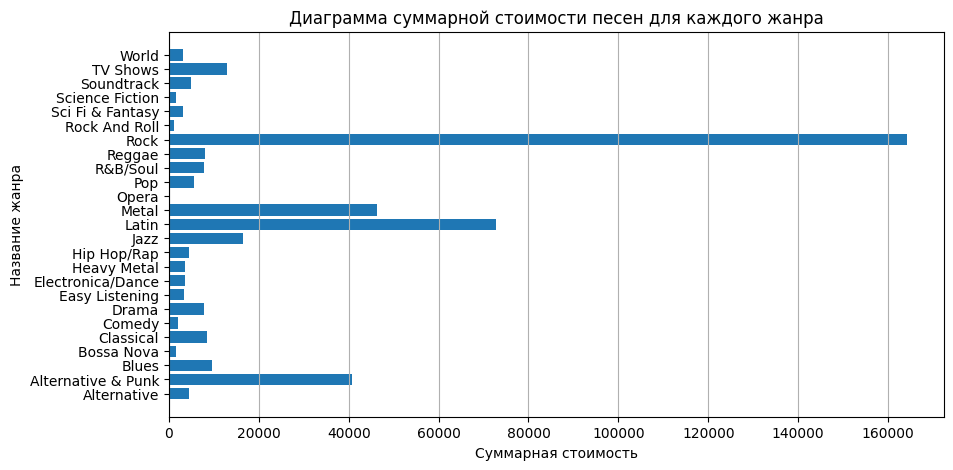

In [106]:
import matplotlib.pyplot as plt

#сгруппируем по жанрам и находим суммарную стоимость
grp = table.groupby('Название жанра')['Стоимость'].sum().reset_index()

#Создаем диаграмму
plt.figure(figsize=(10, 5))
plt.barh(grp['Название жанра'], grp['Стоимость'])
plt.xlabel('Суммарная стоимость')
plt.ylabel('Название жанра')
plt.title('Диаграммa суммарной стоимости песен для каждого жанра')
plt.grid(axis='x')

plt.show()

## Задание 9




### Какой жанр самый высокооплачиваемый/низкооплачиваемый?


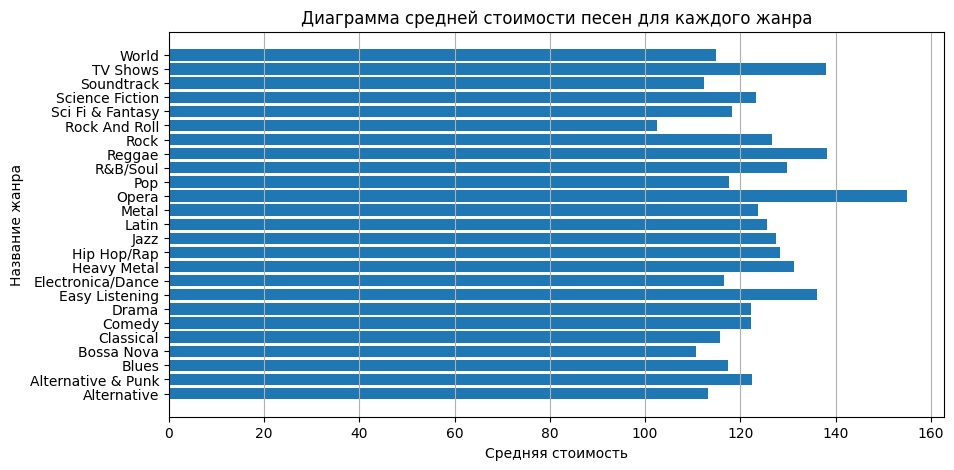

In [107]:
grp = table.groupby('Название жанра')['Стоимость'].mean().reset_index()

#Создаем диаграмму средней стоимости песни для каждого жанра
plt.figure(figsize=(10, 5))
plt.barh(grp['Название жанра'], grp['Стоимость'])
plt.xlabel('Средняя стоимость')
plt.ylabel('Название жанра')
plt.title('Диаграммa средней стоимости песен для каждого жанра')
plt.grid(axis='x')

plt.show()

Вывод: самый высокооплачиваемый жанр это Опера, а низкооплачиваемвый жанр это Рок-н-Ролл

### Зависит ли длительность песен от оплаты?


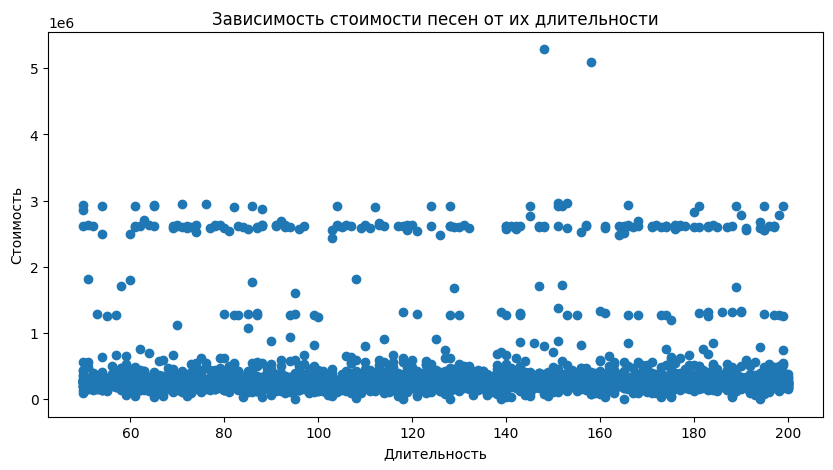

In [108]:
# построим график зависимости длительности песен от стоимости

plt.figure(figsize=(10, 5))
plt.scatter(table['Стоимость'], table['Длительность'])
plt.xlabel('Длительность')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости песен от их длительности')
plt.show()

Вывод: длительность песен не зависит от стоимости, тк есть и дешовые и дорогие песни одинаковой длительности

### Какой жанр имеет больше всего исполнителей?

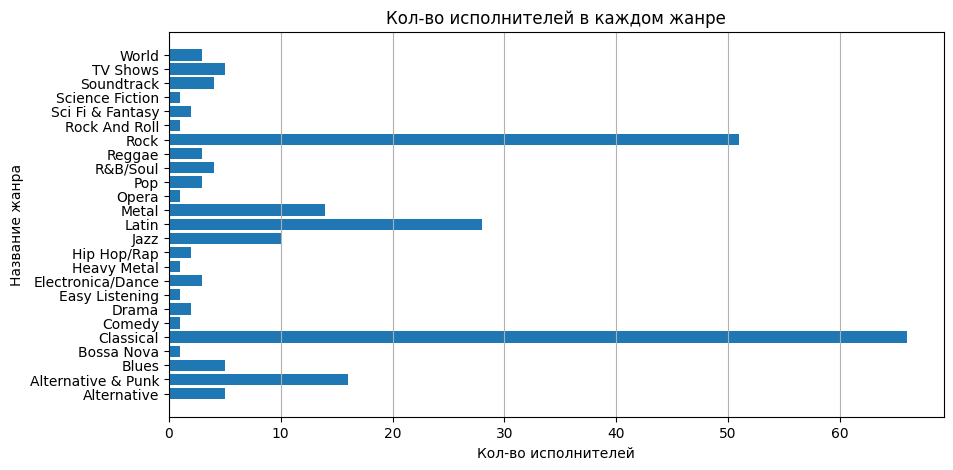

In [109]:
# посчитаем кол-во исполнителей для каджого жанра
grp = table.groupby(['Название жанра', 'Название группы']).count().reset_index()
grp = grp[['Название жанра', 'Название группы']]
grp = grp.groupby(['Название жанра'])['Название группы'].count().reset_index()

# Построим диаграму по кол-ву исполнителей в каждом жанре
plt.figure(figsize=(10, 5))
plt.barh(grp['Название жанра'], grp['Название группы'])
plt.xlabel('Кол-во исполнителей')
plt.ylabel('Название жанра')
plt.title('Кол-во исполнителей в каждом жанре')
plt.grid(axis='x')

plt.show()

Выод: Classical имеет больше всего исполнителей

### Kакой исполнитель заработал больше всего?


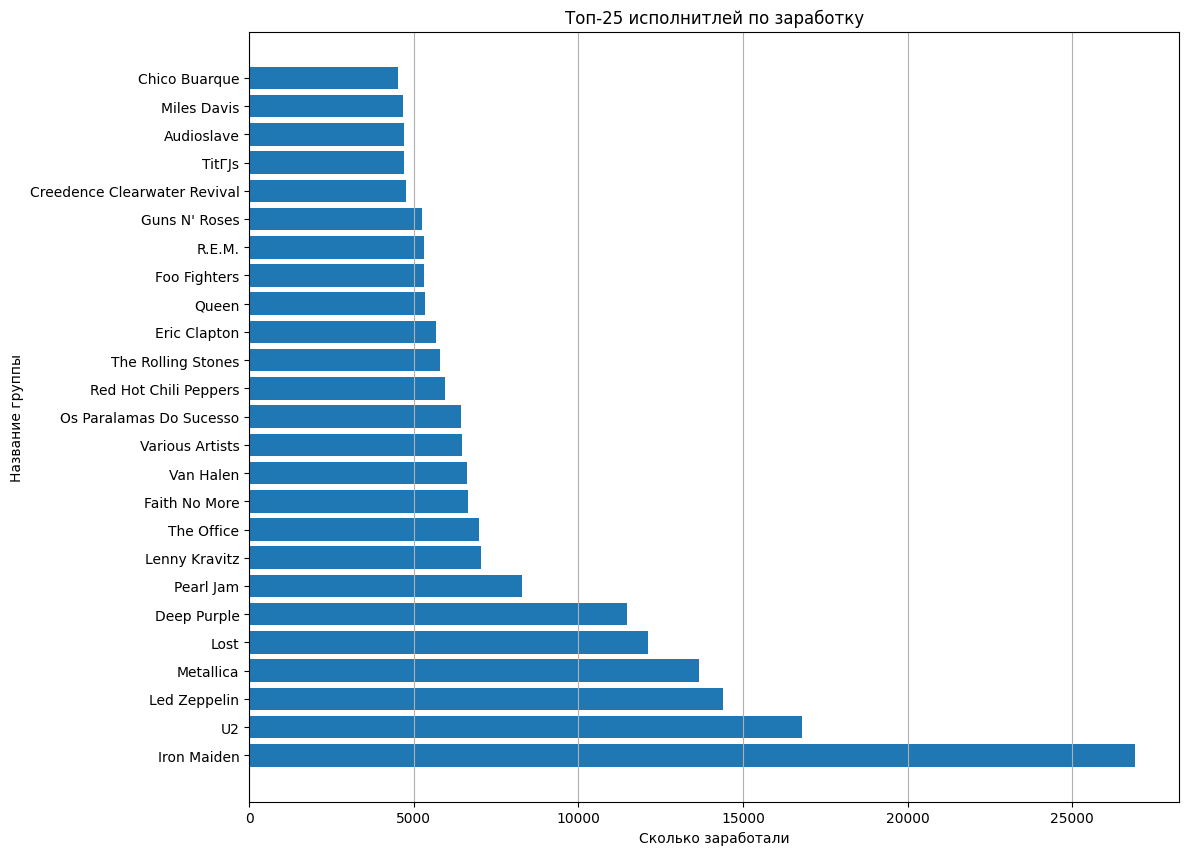

In [110]:
total = table.groupby('Название группы')['Стоимость'].sum().reset_index()
#тк групп много, то на грфике ничего не понятно, возьмем топ-50 по заработку
total = total.sort_values(by='Стоимость', ascending=False).head(25)


plt.figure(figsize=(12, 10))
plt.barh(total['Название группы'], total['Стоимость'])
plt.xlabel('Сколько заработали')
plt.ylabel('Название группы')
plt.title('Топ-25 исполнитлей по заработку')
plt.grid(axis='x')

plt.show()

Вывод: группа Iron Maiden заработали больше всего

## Задание 10

сделать от 3 до 5 выборок формата: ТОП-5 исполнителей по стоимости альбомов, ТОП-10 треков самой большой длительности, ТОП-3 жанров по критерию самого большого размера песен и тд (характер выборки можно придумать под своё усмотрение)

In [111]:
#топ-10 цен по встречаемости
y = table[['Стоимость', 'Название трека']]
y = y.groupby('Стоимость').count()
y = y.rename(columns={'Название трека': 'Встречаемость'})
y.sort_values(by='Встречаемость', ascending=False).head(10)

,Встречаемость
Стоимость,
175,34
69,34
183,34
87,33
74,33
147,33
194,33
136,32
129,32


In [112]:
#топ-5 самых длинных названий трека

table['Длина названия'] = table['Название трека'].astype(str).apply(len)
print(table['Название трека'].head(5))
table = table.drop(columns='Длина названия')

0    For Those About To Rock (We Salute You)
1                      Put The Finger On You
2                            Let's Get It Up
3                           Inject The Venom
4                                 Snowballed
Name: Название трека, dtype: object


In [113]:
# топ 5 самых больших треков по размеру
table.sort_values(by='Размер', ascending=False).head(5)

,Название группы,Название альбома,Название трека,Длительность,Размер,Стоимость,Название жанра
3386,Lost,"Lost, Season 3",Through a Looking Glass,5088838,1059546140,158,Drama
3228,Battlestar Galactica,"Battlestar Galactica, Season 3",Occupation / Precipice,5286953,1054423946,148,TV Shows
3333,Battlestar Galactica (Classic),"Battlestar Galactica (Classic), Season 1",The Young Lords,2863571,587051735,50,Sci Fi & Fantasy
3339,Battlestar Galactica (Classic),"Battlestar Galactica (Classic), Season 1",The Man With Nine Lives,2956998,577829804,153,Sci Fi & Fantasy
3276,Lost,"Lost, Season 2",Dave,2825166,574325829,180,TV Shows


## Задание 11

используя основные статистические метрики (среднее арифметическое, медиана, мода, дисперсия, стандартное отклонение, процентиль) и графики (линейные, столбчатые, рассеяния, круговые, гистограммы) проанализировать данные и предоставить несколько выводов (например, сравнить данные нескольких групп или категорий, прогнозировать и выявить общие тенденции, которые могут быть использованы для прогноза будущих значений, выявить паттерны, выбросы, корреляции или другие важные характеристики).


In [114]:
table.describe()

,Длительность,Размер,Стоимость
count,3.503000e+03,3.503000e+03,3503.000000
mean,3.935992e+05,3.351021e+07,125.044248
std,5.350054e+05,1.053925e+08,43.544912
min,1.071000e+03,3.874700e+04,50.000000
25%,2.072810e+05,6.342566e+06,87.000000
50%,2.556340e+05,8.107896e+06,125.000000
75%,3.216450e+05,1.026679e+07,163.000000
max,5.286953e+06,1.059546e+09,200.000000


In [115]:
table.mode()

,Название группы,Название альбома,Название трека,Длительность,Размер,Стоимость,Название жанра
0,Iron Maiden,Greatest Hits,2 Minutes To Midnight,240091.0,10323804.0,69.0,Rock
1,NaN,NaN,Hallowed Be Thy Name,NaN,17760384.0,175.0,NaN
2,NaN,NaN,Iron Maiden,NaN,NaN,183.0,NaN
3,NaN,NaN,The Number Of The Beast,NaN,NaN,NaN,NaN
4,NaN,NaN,The Trooper,NaN,NaN,NaN,NaN
5,NaN,NaN,Wrathchild,NaN,NaN,NaN,NaN


найдем 2 самые популярне группы

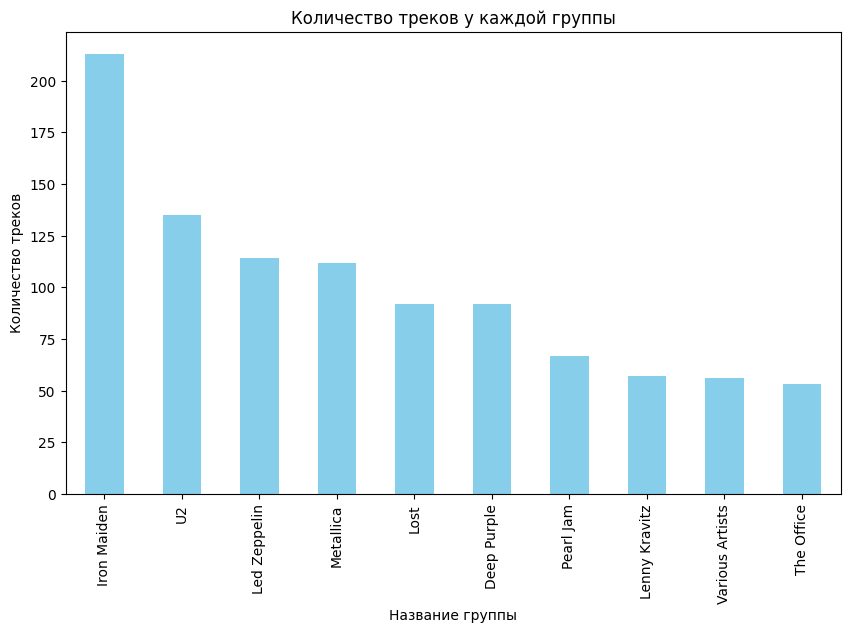

In [116]:
track_counts = table["Название группы"].value_counts().head(10)
plt.figure(figsize=(10, 6))
track_counts.plot(kind='bar', color='skyblue')
plt.title('Количество треков у каждой группы')
plt.xlabel('Название группы')
plt.ylabel('Количество треков')
plt.show()

топ 2 исполнителей это Iron Maiden и U2.

Давайте их сравним



In [117]:
group_1 = table[table["Название группы"] == "Iron Maiden"]
group_2 = table[table["Название группы"] == "U2"]

# Средняя длительность треков для каждой группы в секундах
avg_group_1 = group_1["Длительность"].mean()//10_00
avg_group_2 = group_2["Длительность"].mean()//10_00

# Вывод результата
print(f"Средняя длительность треков Iron Maiden: {avg_group_1} секунд")
print(f"Средняя длительность треков U2: {round(avg_group_2, 2)} секунд")


Средняя длительность треков Iron Maiden: 337.0 секунд
Средняя длительность треков U2: 262.0 секунд


Видим, что у Iron Maiden длительность треков больше, предположим что чем больше треков у группы тем больше продолжительность

In [118]:
table

,Название группы,Название альбома,Название трека,Длительность,Размер,Стоимость,Название жанра
0,AC/DC,For Those About To Rock We Salute You,For Those About To Rock (We Salute You),343719,11170334,101,Rock
1,AC/DC,For Those About To Rock We Salute You,Put The Finger On You,205662,6713451,136,Rock
2,AC/DC,For Those About To Rock We Salute You,Let's Get It Up,233926,7636561,58,Rock
3,AC/DC,For Those About To Rock We Salute You,Inject The Venom,210834,6852860,169,Rock
4,AC/DC,For Those About To Rock We Salute You,Snowballed,203102,6599424,89,Rock
...,...,...,...,...,...,...,...
3498,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp","Locatelli: Concertos for Violin, Strings and C...","Concerto for Violin, Strings and Continuo in G...",493573,16454937,195,Classical
3499,Emerson String Quartet,Schubert: The Late String Quartets & String Qu...,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",139200,2283131,80,Classical
3500,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",Monteverdi: L'Orfeo,"L'orfeo, Act 3, Sinfonia (Orchestra)",66639,1189062,133,Classical
3501,Nash Ensemble,Mozart: Chamber Music,"Quintet for Horn, Violin, 2 Violas, and Cello ...",221331,3665114,94,Classical


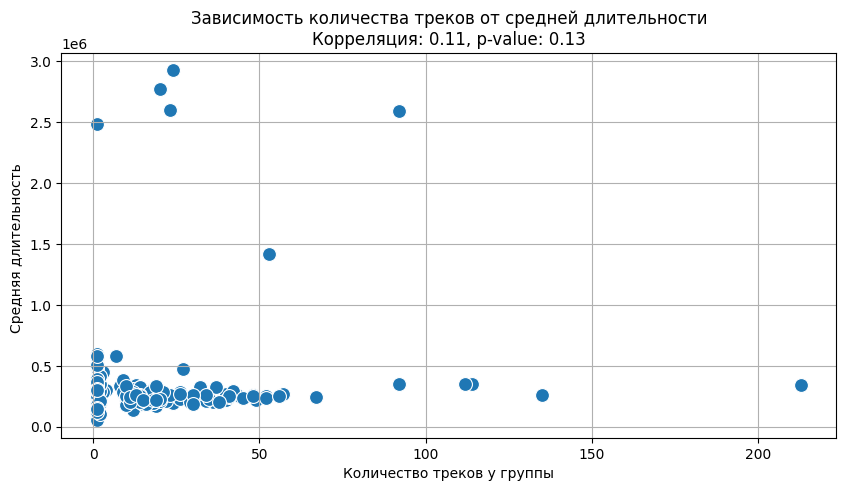

In [125]:
import seaborn as sns
from scipy.stats import pearsonr


# Подсчет количества треков для каждой группы и средней длительности треков
group_stats = table.groupby("Название группы").agg(
    Количество_треков=("Название трека", "count"),
    Средняя_длительность=("Длительность", "mean")
).reset_index()

# Вычисление корреляции
correlation, p_value = pearsonr(group_stats["Количество_треков"], group_stats["Средняя_длительность"])

# Построение диаграммы
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Количество_треков", y="Средняя_длительность", data=group_stats, s=100)
plt.title(f'Зависимость количества треков от средней длительности\nКорреляция: {correlation:.2f}, p-value: {p_value:.2f}')
plt.xlabel('Количество треков у группы')
plt.ylabel('Средняя длительность ')
plt.grid(True)
plt.show()


тк p-value = 0,11 , то результат стат-значим.
Также из графика видим, что кол-во треков группы и иx средней длительности никак не связаны. Также это можно понять по корреляции, она близка к 0

Наша гипотеза не подтвердилась